# Install and Functions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import multiprocessing

In [ ]:
def read_output_files(folder_path):
    dfs = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.pkl'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'rb') as file:
                df = pickle.load(file)
                dfs.append(df)
    if dfs:
        combined_df = pd.concat(dfs, ignore_index=True)
        return combined_df
    else:
        print("No pickle files found in the folder.")
        return None
out_path = 'Output'

# Regression

## With correlation

In [ ]:
ds_model = read_output_files(out_path)
ds_model_srt = ds_model.sort_values(by='PercentRemoved')
ds_model_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.982456,0.00
1,2,0.973684,0.07
2,2,0.973684,0.14
3,2,0.973684,0.21
4,2,0.973684,0.28
...,...,...,...
1296,2,1.000000,90.72
1297,2,1.000000,90.79
1298,2,1.000000,90.86
1299,2,1.000000,90.93


In [ ]:
hg_acc_rg = ds_model_srt['Accuracy'].max()
lw_acc_rg = ds_model_srt['Accuracy'].min()
base_acc_rg = ds_model_srt['Accuracy'].iloc[0]


acc_hl_rg = hg_acc_rg - lw_acc_rg
acc_hb_rg = hg_acc_rg - base_acc_rg
acc_lb_rg = lw_acc_rg - base_acc_rg

print("Difference between highest and lowest accuracy:", acc_hl_rg)
print("Difference between highest and base accuracy:", acc_hb_rg)
print("Difference between lowest and base accuracy:", acc_lb_rg)

rgkeyval = {
    'high_acc': [hg_acc_rg],
    'low_acc': [lw_acc_rg],
    'base_acc': [base_acc_rg],
    'diff_high_low': [acc_hl_rg],
    'diff_high_base': [acc_hb_rg],
    'diff_low_base': [acc_lb_rg]
}

dataf = pd.DataFrame(rgkeyval)
dataf

Difference between highest and lowest accuracy: 0.05084745762711862
Difference between highest and base accuracy: 0.01754385964912286
Difference between lowest and base accuracy: -0.03330359797799576


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,1.0,0.949153,0.982456,0.050847,0.017544,-0.033304


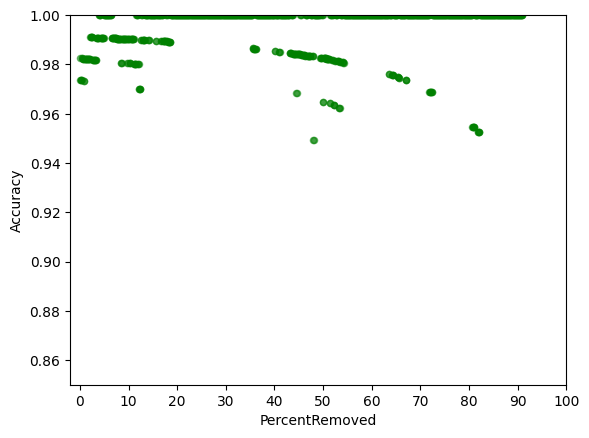

In [ ]:
ds_model_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.ylim(0.85, 1)
plt.show()

## Without correlation

In [ ]:
ds_model = read_output_files(out_path)
ds_model_srt = ds_model.sort_values(by='PercentRemoved')
ds_model_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.903509,0.00
1,2,0.885965,0.07
2,2,0.885965,0.14
3,2,0.868421,0.21
4,2,0.868421,0.28
...,...,...,...
1296,2,1.000000,90.72
1297,2,1.000000,90.79
1298,2,1.000000,90.86
1299,2,1.000000,90.93


In [ ]:
hg_acc_rg = ds_model_srt['Accuracy'].max()
lw_acc_rg = ds_model_srt['Accuracy'].min()
base_acc_rg = ds_model_srt['Accuracy'].iloc[0]


acc_hl_rg = hg_acc_rg - lw_acc_rg
acc_hb_rg = hg_acc_rg - base_acc_rg
acc_lb_rg = lw_acc_rg - base_acc_rg

print("Difference between highest and lowest accuracy:", acc_hl_rg)
print("Difference between highest and base accuracy:", acc_hb_rg)
print("Difference between lowest and base accuracy:", acc_lb_rg)

rgkeyval = {
    'high_acc': [hg_acc_rg],
    'low_acc': [lw_acc_rg],
    'base_acc': [base_acc_rg],
    'diff_high_low': [acc_hl_rg],
    'diff_high_base': [acc_hb_rg],
    'diff_low_base': [acc_lb_rg]
}

dataf = pd.DataFrame(rgkeyval)
dataf

Difference between highest and lowest accuracy: 0.25
Difference between highest and base accuracy: 0.0964912280701754
Difference between lowest and base accuracy: -0.1535087719298246


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,1.0,0.75,0.903509,0.25,0.096491,-0.153509


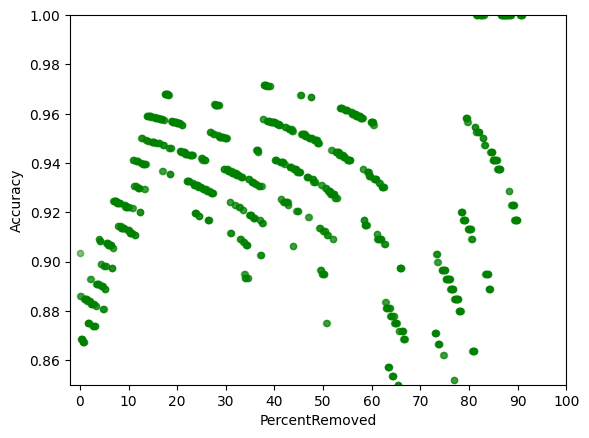

In [ ]:
ds_model_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.ylim(0.85, 1)
plt.show()

# Decision Tree

## With correlation

In [ ]:
ds_model_dtn = read_output_files(out_path)
ds_model_dtn_srt = ds_model_dtn.sort_values(by='PercentRemoved')
ds_model_dtn_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.877193,0.00
1,2,0.929825,0.07
2,2,0.929825,0.14
3,2,0.929825,0.21
4,2,0.929825,0.28
...,...,...,...
1296,2,1.000000,90.72
1297,2,1.000000,90.79
1298,2,1.000000,90.86
1299,2,1.000000,90.93


In [ ]:
hg_acc_dt = ds_model_dtn_srt['Accuracy'].max()
lw_acc_dt = ds_model_dtn_srt['Accuracy'].min()
base_acc_dt = ds_model_dtn_srt['Accuracy'].iloc[0]


acc_hl_dt = hg_acc_dt - lw_acc_dt
acc_hb_dt = hg_acc_dt - base_acc_dt
acc_lb_dt = lw_acc_dt - base_acc_dt

print("Difference between highest and lowest accuracy:", acc_hl_dt)
print("Difference between highest and base accuracy:", acc_hb_dt)
print("Difference between lowest and base accuracy:", acc_lb_dt)

dtkeyval = {
    'high_acc': [hg_acc_dt],
    'low_acc': [lw_acc_dt],
    'base_acc': [base_acc_dt],
    'diff_high_low': [acc_hl_dt],
    'diff_high_base': [acc_hb_dt],
    'diff_low_base': [acc_lb_dt]
}

dataf_dt = pd.DataFrame(dtkeyval)
dataf_dt

Difference between highest and lowest accuracy: 0.1923076923076923
Difference between highest and base accuracy: 0.1228070175438597
Difference between lowest and base accuracy: -0.06950067476383259


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,1.0,0.807692,0.877193,0.192308,0.122807,-0.069501


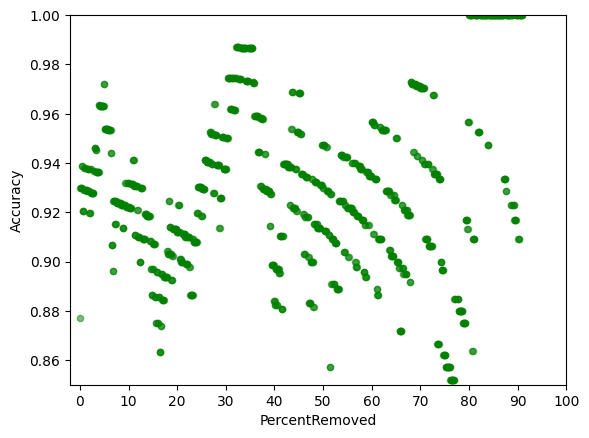

In [ ]:
ds_model_dtn_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.ylim(0.85, 1)
plt.show()

## Without correlation

In [ ]:
ds_model_dty = read_output_files(out_path)
ds_model_dty_srt = ds_model_dty.sort_values(by='PercentRemoved')
ds_model_dty_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.824561,0.00
1,2,0.807018,0.07
2,2,0.807018,0.14
3,2,0.807018,0.21
4,2,0.807018,0.28
...,...,...,...
1296,2,0.909091,90.72
1297,2,0.909091,90.79
1298,2,0.909091,90.86
1299,2,0.818182,90.93


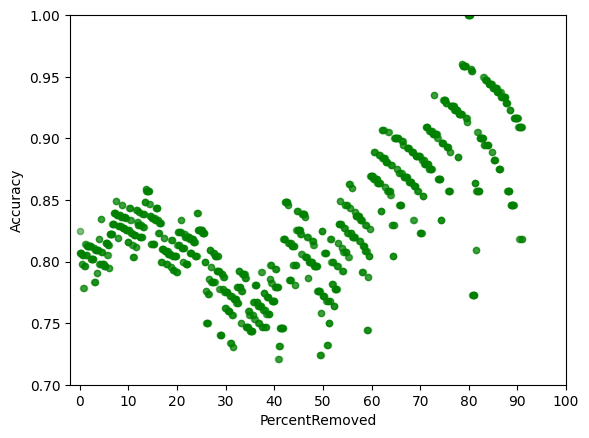

In [ ]:
ds_model_dty_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.ylim(0.7, 1)
plt.show()

# Bagging

## With correlation

In [ ]:
ds_model_bgn = read_output_files(out_path)
ds_model__bgn_srt = ds_model_bgn.sort_values(by='PercentRemoved')
ds_model__bgn_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.903509,0.00
1,2,0.938596,0.07
2,2,0.938596,0.14
3,2,0.929825,0.21
4,2,0.929825,0.28
...,...,...,...
1296,2,1.000000,90.72
1297,2,1.000000,90.79
1298,2,1.000000,90.86
1299,2,1.000000,90.93


In [ ]:
hg_acc_bg = ds_model__bgn_srt['Accuracy'].max()
lw_acc_bg = ds_model__bgn_srt['Accuracy'].min()
base_acc_bg = ds_model__bgn_srt['Accuracy'].iloc[0]


acc_hl_bg = hg_acc_bg - lw_acc_bg
acc_hb_bg = hg_acc_bg - base_acc_bg
acc_lb_bg = lw_acc_bg - base_acc_bg

print("Difference between highest and lowest accuracy:", acc_hl_bg)
print("Difference between highest and base accuracy:", acc_hb_bg)
print("Difference between lowest and base accuracy:", acc_lb_bg)

bgkeyval = {
    'high_acc': [hg_acc_bg],
    'low_acc': [lw_acc_bg],
    'base_acc': [base_acc_bg],
    'diff_high_low': [acc_hl_bg],
    'diff_high_base': [acc_hb_bg],
    'diff_low_base': [acc_lb_bg]
}

dataf_bg = pd.DataFrame(bgkeyval)
dataf_bg

Difference between highest and lowest accuracy: 0.125
Difference between highest and base accuracy: 0.0964912280701754
Difference between lowest and base accuracy: -0.028508771929824595


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,1.0,0.875,0.903509,0.125,0.096491,-0.028509


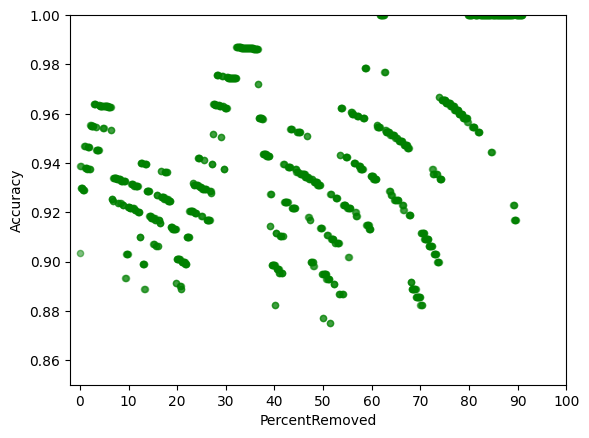

In [ ]:
ds_model__bgn_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.ylim(0.85, 1)
plt.show()

## Without correlation

In [ ]:
ds_model1 = read_output_files(out_path)
ds_model_srt1 = ds_model1.sort_values(by='PercentRemoved')
ds_model_srt1

,DataSize,Accuracy,PercentRemoved
0,2,0.868421,0.00
1,2,0.807018,0.07
2,2,0.807018,0.14
3,2,0.807018,0.21
4,2,0.807018,0.28
...,...,...,...
1296,2,0.909091,90.72
1297,2,0.909091,90.79
1298,2,0.909091,90.86
1299,2,0.818182,90.93


In [ ]:
hg_acc_bgy = ds_model_srt1['Accuracy'].max()
lw_acc_bgy = ds_model_srt1['Accuracy'].min()
base_acc_bgy = ds_model_srt1['Accuracy'].iloc[0]


acc_hl_bgy = hg_acc_bgy - lw_acc_bgy
acc_hb_bgy = hg_acc_bgy - base_acc_bgy
acc_lb_bgy = lw_acc_bgy - base_acc_bgy

print("Difference between highest and lowest accuracy:", acc_hl_bgy)
print("Difference between highest and base accuracy:", acc_hb_bgy)
print("Difference between lowest and base accuracy:", acc_lb_bgy)

bgykeyval = {
    'high_acc': [hg_acc_bgy],
    'low_acc': [lw_acc_bgy],
    'base_acc': [base_acc_bgy],
    'diff_high_low': [acc_hl_bgy],
    'diff_high_base': [acc_hb_bgy],
    'diff_low_base': [acc_lb_bgy]
}

dataf_bgy = pd.DataFrame(bgykeyval)
dataf_bgy

Difference between highest and lowest accuracy: 0.2571428571428571
Difference between highest and base accuracy: 0.13157894736842102
Difference between lowest and base accuracy: -0.1255639097744361


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,1.0,0.742857,0.868421,0.257143,0.131579,-0.125564


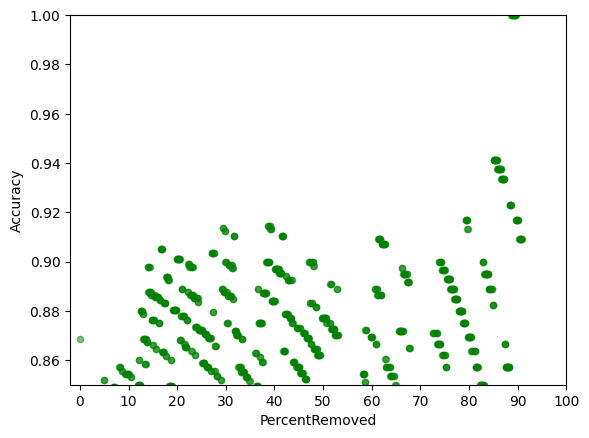

In [ ]:
ds_model_srt1.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.ylim(0.85, 1)
plt.show()

# Random Forest

## With correlation

In [ ]:
ds_model_rfn = read_output_files(out_path)
ds_model_rfn_srt = ds_model_rfn.sort_values(by='PercentRemoved')
ds_model_rfn_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.947368,0.00
1,2,0.956140,0.07
2,2,0.956140,0.14
3,2,0.956140,0.21
4,2,0.956140,0.28
...,...,...,...
1296,2,0.909091,90.72
1297,2,0.909091,90.79
1298,2,0.909091,90.86
1299,2,1.000000,90.93


In [ ]:
hg_acc_rf = ds_model_rfn_srt['Accuracy'].max()
lw_acc_rf = ds_model_rfn_srt['Accuracy'].min()
base_acc_rf = ds_model_rfn_srt['Accuracy'].iloc[0]


acc_hl_rf = hg_acc_rf - lw_acc_rf
acc_hb_rf = hg_acc_rf - base_acc_rf
acc_lb_rf = lw_acc_rf - base_acc_rf

print("Difference between highest and lowest accuracy:", acc_hl_rf)
print("Difference between highest and base accuracy:", acc_hb_rf)
print("Difference between lowest and base accuracy:", acc_lb_rf)

rfkeyval = {
    'high_acc': [hg_acc_rf],
    'low_acc': [lw_acc_rf],
    'base_acc': [base_acc_rf],
    'diff_high_low': [acc_hl_rf],
    'diff_high_base': [acc_hb_rf],
    'diff_low_base': [acc_lb_rf]
}

dataf_rf = pd.DataFrame(rfkeyval)
dataf_rf

Difference between highest and lowest accuracy: 0.10169491525423724
Difference between highest and base accuracy: 0.052631578947368474
Difference between lowest and base accuracy: -0.049063336306868766


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,1.0,0.898305,0.947368,0.101695,0.052632,-0.049063


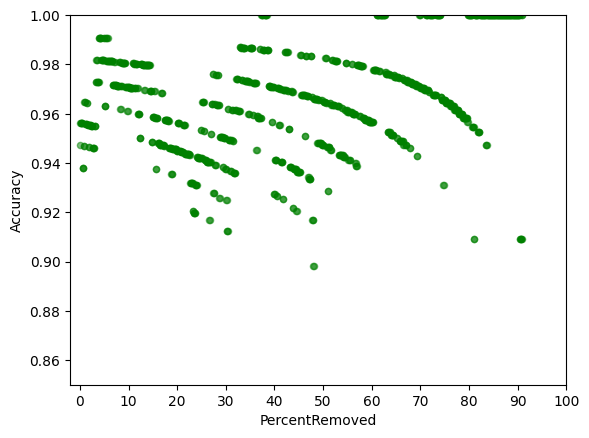

In [ ]:
ds_model_rfn_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.ylim(0.85, 1)
plt.show()

## Without correlation

In [ ]:
ds_model1_rf = read_output_files(out_path)
ds_model_srt1 = ds_model1_rf.sort_values(by='PercentRemoved')
ds_model_srt1

,DataSize,Accuracy,PercentRemoved
0,2,0.842105,0.00
1,2,0.833333,0.07
2,2,0.833333,0.14
3,2,0.824561,0.21
4,2,0.824561,0.28
...,...,...,...
1296,2,1.000000,90.72
1297,2,1.000000,90.79
1298,2,1.000000,90.86
1299,2,0.909091,90.93


In [ ]:
hg_acc_rfy = ds_model_srt1['Accuracy'].max()
lw_acc_rfy = ds_model_srt1['Accuracy'].min()
base_acc_rfy = ds_model_srt1['Accuracy'].iloc[0]


acc_hl_rfy = hg_acc_rfy - lw_acc_rfy
acc_hb_rfy = hg_acc_rfy - base_acc_rfy
acc_lb_rfy = lw_acc_rfy - base_acc_rfy

print("Difference between highest and lowest accuracy:", acc_hl_rfy)
print("Difference between highest and base accuracy:", acc_hb_rfy)
print("Difference between lowest and base accuracy:", acc_lb_rfy)

rfykeyval = {
    'high_acc': [hg_acc_rfy],
    'low_acc': [lw_acc_rfy],
    'base_acc': [base_acc_rfy],
    'diff_high_low': [acc_hl_rfy],
    'diff_high_base': [acc_hb_rfy],
    'diff_low_base': [acc_lb_rfy]
}

dataf_rfy = pd.DataFrame(rfykeyval)
dataf_rfy

Difference between highest and lowest accuracy: 0.2727272727272727
Difference between highest and base accuracy: 0.1578947368421053
Difference between lowest and base accuracy: -0.1148325358851674


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,1.0,0.727273,0.842105,0.272727,0.157895,-0.114833


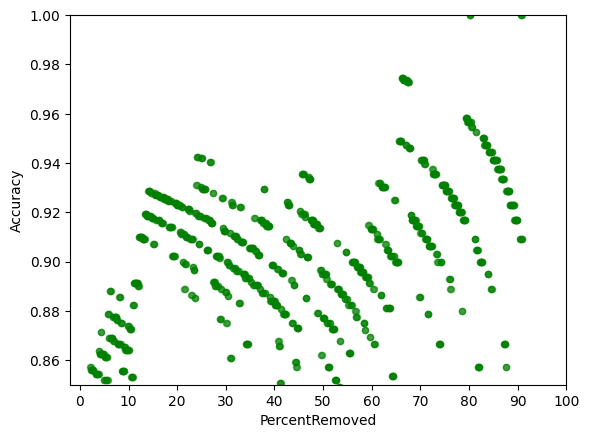

In [ ]:
ds_model_srt1.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.ylim(0.85, 1)
plt.show()

# CatBoost

## Without correlation

In [ ]:
ds_model_ctb = read_output_files(out_path)
ds_model_ctb_srt = ds_model_ctb.sort_values(by='PercentRemoved')
ds_model_ctb_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.956140,0.00
1,2,0.982456,0.07
2,2,0.982456,0.14
3,2,0.973684,0.21
4,2,0.973684,0.28
...,...,...,...
1296,2,1.000000,90.72
1297,2,1.000000,90.79
1298,2,1.000000,90.86
1299,2,1.000000,90.93


In [ ]:
hg_acc_cb = ds_model_ctb_srt['Accuracy'].max()
lw_acc_cb = ds_model_ctb_srt['Accuracy'].min()
base_acc_cb = ds_model_ctb_srt['Accuracy'].iloc[0]


acc_hl_cb = hg_acc_cb - lw_acc_cb
acc_hb_cb = hg_acc_cb - base_acc_cb
acc_lb_cb = lw_acc_cb - base_acc_cb

print("Difference between highest and lowest accuracy:", acc_hl_cb)
print("Difference between highest and base accuracy:", acc_hb_cb)
print("Difference between lowest and base accuracy:", acc_lb_cb)

cbkeyval = {
    'high_acc': [hg_acc_cb],
    'low_acc': [lw_acc_cb],
    'base_acc': [base_acc_cb],
    'diff_high_low': [acc_hl_cb],
    'diff_high_base': [acc_hb_cb],
    'diff_low_base': [acc_lb_cb]
}

dataf_cb = pd.DataFrame(cbkeyval)
dataf_cb

Difference between highest and lowest accuracy: 0.04761904761904767
Difference between highest and base accuracy: 0.04385964912280704
Difference between lowest and base accuracy: -0.003759398496240629


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,1.0,0.952381,0.95614,0.047619,0.04386,-0.003759


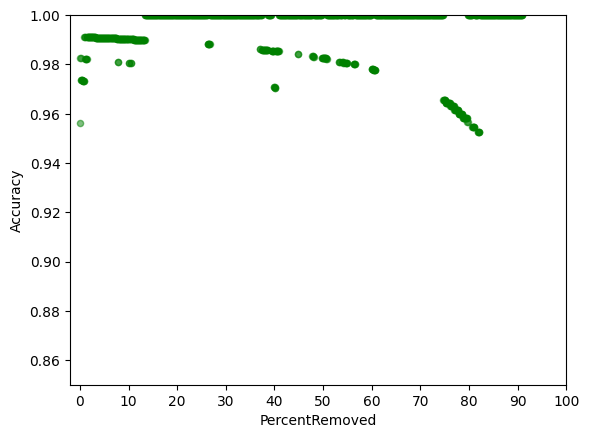

In [ ]:
ds_model_ctb_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.ylim(0.85, 1)
plt.show()

## With correlation

In [ ]:
ds_model1 = read_output_files(out_path)
ds_model_srt1 = ds_model1.sort_values(by='PercentRemoved')
ds_model_srt1

,DataSize,Accuracy,PercentRemoved
0,2,0.921053,0.00
1,2,0.982456,0.07
2,2,0.982456,0.14
3,2,0.973684,0.21
4,2,0.973684,0.28
...,...,...,...
1296,2,1.000000,90.72
1297,2,1.000000,90.79
1298,2,1.000000,90.86
1299,2,1.000000,90.93


In [ ]:
hg_acc_cb = ds_model_srt1['Accuracy'].max()
lw_acc_cb = ds_model_srt1['Accuracy'].min()
base_acc_cb = ds_model_srt1['Accuracy'].iloc[0]


acc_hl_cb = hg_acc_cb - lw_acc_cb
acc_hb_cb = hg_acc_cb - base_acc_cb
acc_lb_cb = lw_acc_cb - base_acc_cb

print("Difference between highest and lowest accuracy:", acc_hl_cb)
print("Difference between highest and base accuracy:", acc_hb_cb)
print("Difference between lowest and base accuracy:", acc_lb_cb)

cbkeyval = {
    'high_acc': [hg_acc_cb],
    'low_acc': [lw_acc_cb],
    'base_acc': [base_acc_cb],
    'diff_high_low': [acc_hl_cb],
    'diff_high_base': [acc_hb_cb],
    'diff_low_base': [acc_lb_cb]
}

dataf_cb = pd.DataFrame(cbkeyval)
dataf_cb

Difference between highest and lowest accuracy: 0.16666666666666663
Difference between highest and base accuracy: 0.07894736842105265
Difference between lowest and base accuracy: -0.08771929824561397


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,1.0,0.833333,0.921053,0.166667,0.078947,-0.087719


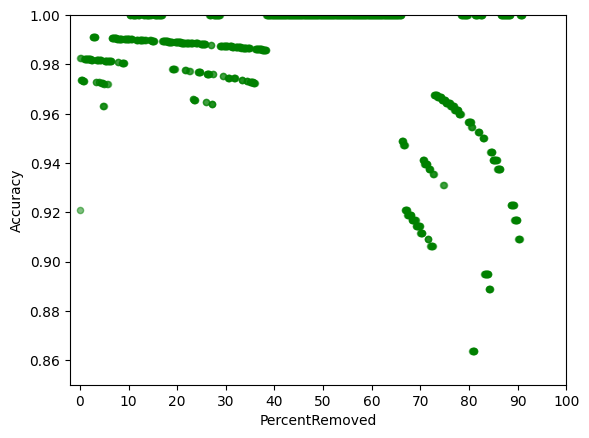

In [ ]:
ds_model_srt1.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.ylim(0.85, 1)
plt.show()